In [15]:
import pandas as pd
import numpy as np

# Define the file names
file_names = [
    "TWO_verification_EP_ext_table13b.ods",
    "TWO_verification_EP_short_table12b.ods",
    "TWO_verification_NA_ext_table13a.ods",
    "TWO_verification_NA_short_table12a.ods"
]

# Define the column names
column_names = ['prob', 'verify', 'num_forecasts']

# Initialize an empty dictionary to store the data
data = {}

# Loop through each file
for file in file_names:
    # Read the ODS file into a pandas Excel file object
    xls = pd.ExcelFile(file)
    
    # Get the sheet names (years) from the file
    years = xls.sheet_names
    
    # Initialize an empty dictionary to store the file data
    data[file] = {}
    
    # Loop through each sheet (year) in the file
    for year in years:
        # Read the sheet into a pandas DataFrame and assign column names
        df = xls.parse(year, header=None, names=column_names)
        
        # Replace "-" with NaN and convert columns to appropriate types
        df = df.replace('-', np.nan)
        df['prob'] = df['prob'].astype(float)
        df['verify'] = df['verify'].astype(float)
        df['num_forecasts'] = df['num_forecasts'].astype(int)
        
        # Store the DataFrame in the data dictionary
        data[file][year] = df

In [85]:
## Initialize an empty dictionary to store the skill measure
skill_measure = {}

# Loop through each file in the data dictionary
for file, sheets in data.items():
    # Initialize an empty dictionary to store the skill measure for the file
    skill_measure[file] = {}
    
    # Loop through each sheet (year) in the file
    for year, df in sheets.items():
        # Calculate the MAE for the current sheet
        verify = (df['verify'] / 100)
        prob = (df['prob'] / 100)
        num_forecasts = df['num_forecasts']
        verify_prob_mult = np.abs(prob - verify) * num_forecasts
        
        total_num_forecasts = df['num_forecasts'].sum()
        mae = verify_prob_mult.sum() / total_num_forecasts
        
        # Store the Brier Score in the skill measure dictionary
        skill_measure[file][year] = mae

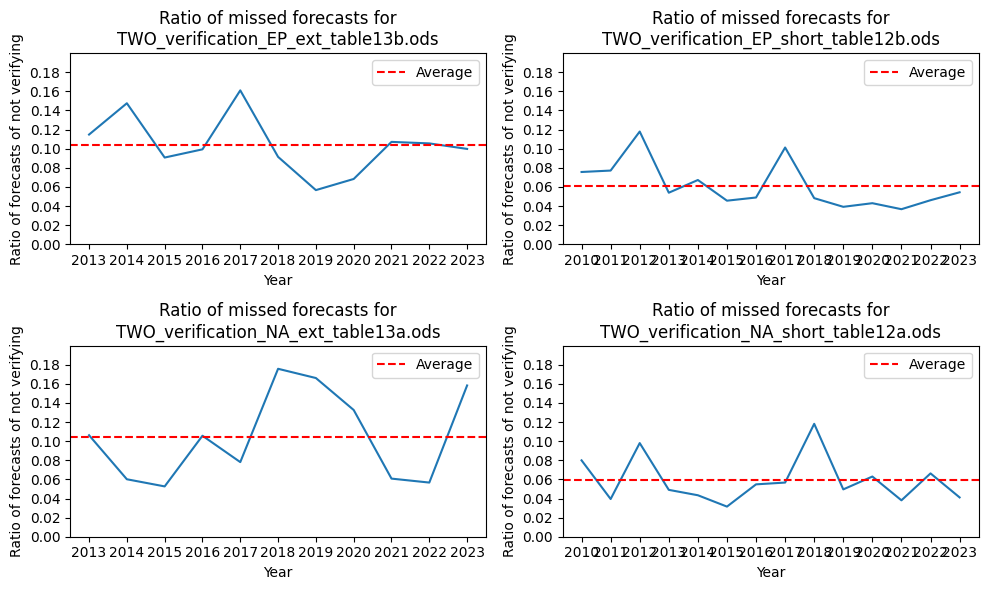

In [86]:
import matplotlib.pyplot as plt

# Create a 4-panel figure
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Loop through each file in the skill_measure dictionary
for i, (file, years) in enumerate(skill_measure.items()):
    # Get the current axis
    ax = axs[i // 2, i % 2]
    
    # Plot the Brier Score over time
    ax.plot(years.keys(), years.values())
    
    # Calculate the average
    average = sum(years.values()) / len(years)
    
    # Plot the average as a red line
    ax.axhline(y=average, color='r', linestyle='--', label='Average')
    
    # Set the title and labels
    ax.set_title(f'Ratio of missed forecasts for\n{file}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Ratio of forecasts of not verifying')
    
    # Set the y-axis limits and ticks
    ax.set_ylim(0, 0.2)
    ax.set_yticks(np.arange(0, 0.2, 0.02))
    
    # Show the legend
    ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [87]:
## Initialize an empty dictionary to store the skill measure
skill_measure = {}

# Loop through each file in the data dictionary
for file, sheets in data.items():
    # Initialize an empty dictionary to store the skill measure for the file
    skill_measure[file] = {}
    
    # Loop through each sheet (year) in the file
    for year, df in sheets.items():
        # Filter out trivial cases (0 or 100% probabilities)
        df_filtered = df[(df['prob'] > 0) & (df['prob'] < 100)]
        
        # Calculate the MAE for the current sheet (only considering non-trivial cases)
        verify = (df_filtered['verify'] / 100)
        prob = (df_filtered['prob'] / 100)
        num_forecasts = df_filtered['num_forecasts']
        verify_prob_mult = np.abs(prob - verify) * num_forecasts
        
        total_num_forecasts = df_filtered['num_forecasts'].sum()
        mae = verify_prob_mult.sum() / total_num_forecasts
        
        # Store the Brier Score in the skill measure dictionary
        skill_measure[file][year] = mae

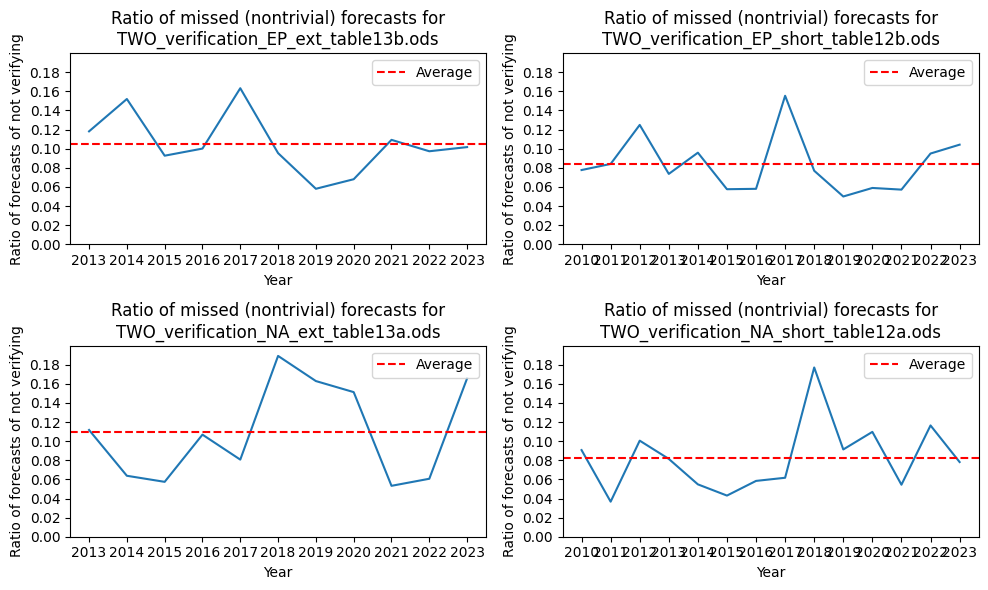

In [88]:
import matplotlib.pyplot as plt

# Create a 4-panel figure
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Loop through each file in the skill_measure dictionary
for i, (file, years) in enumerate(skill_measure.items()):
    # Get the current axis
    ax = axs[i // 2, i % 2]
    
    # Plot the Brier Score over time
    ax.plot(years.keys(), years.values())
    
    # Calculate the average
    average = sum(years.values()) / len(years)
    
    # Plot the average as a red line
    ax.axhline(y=average, color='r', linestyle='--', label='Average')
    
    # Set the title and labels
    ax.set_title(f'Ratio of missed (nontrivial) forecasts for\n{file}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Ratio of forecasts of not verifying')
    
    # Set the y-axis limits and ticks
    ax.set_ylim(0, 0.2)
    ax.set_yticks(np.arange(0, 0.2, 0.02))
    
    # Show the legend
    ax.legend()

# Show the plot
plt.tight_layout()
plt.show()